In [20]:
using JLD2, Plots, CurveFit
λ_list = [ 0.07788333333333333 + 0.061im]
L_list = [6,8,10,12,14,16,18,19,20]
Op_label  = ["I","σ","ϵ","L-1ϵ"]
data = load("D500results.jld2")
Δth = [0,data["Δσ th "],data[ "Δε th"],data["ΔL1ε th"]]
cth = 1.13754733664723 - 0.0210687419403234im

1.13754733664723 - 0.0210687419403234im

In [21]:
Δ_list = zeros(ComplexF64,length(L_list),length(λ_list),3)
E0_list = zeros(ComplexF64,length(L_list),length(λ_list))
lambda = 0.07788333333333333 + 0.06im
for (i,L) in enumerate([6,8,10,12,14,16])
    lambda_txt = round(lambda,digits = 8)
    results = load_object("Lambda_est_precise/PBC/PBC_D_400/PBC L = $L"*",5statesQP$lambda_txt.jld2")
    E0_list[i,:] = [results[2]]
    Δ_list[i,:,1] = [results[end-1]]
    Δ_list[i,:,2] = [results[3]]
    Δ_list[i,:,3] = [results[4]]
end


for (i,L) in enumerate([18,19,20])
    lambda_txt = round(lambda,digits = 6)
    results = load_object("Lambda_est_precise/PBC/PBC_D_300/5E_PBC_L=$L"*"_$lambda_txt.jld2")
    E0_list[i+6,:] = [results[1]]
    Δ_list[i+6,:,1] = [results[end-1]]
    Δ_list[i+6,:,2] = [results[2]]
    Δ_list[i+6,:,3] = [results[3]]
end

┌ Warning: type TensorKitSectors.ZNIrrep{5} does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\vicva\.julia\packages\JLD2\nPYlZ\src\data\reconstructing_datatypes.jl:574
┌ Warning: type TensorKit.GradedSpace{JLD2.ReconstructedStatic{Symbol("ZNIrrep{5}"), (:n,), Tuple{Int8}},NTuple{5, Int64}} does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\vicva\.julia\packages\JLD2\nPYlZ\src\data\reconstructing_datatypes.jl:574
┌ Warning: type TensorKit.TensorMap{ComplexF64,JLD2.ReconstructedStatic{Symbol("GradedSpace{JLD2.ReconstructedStatic{Symbol(\"ZNIrrep{5}\"), (:n,), Tuple{Int8}},NTuple{5, Int64}}"), (:dims, :dual), Tuple{NTuple{5, Int64}, Bool}},2,1,Vector{ComplexF64}} does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\vicva\.julia\packages\JLD2\nPYlZ\src\data\reconstructing_datatypes.jl:574
┌ Warning: type TensorKit.ProductSpace{JLD2.ReconstructedStatic{Symbol("GradedSpace{JLD2.ReconstructedStatic{Symbol(\"ZNIrrep{5}\"), (:n,), Tuple{Int8}},NTuple{5, Int64}}")

In [22]:
Δ_list[:,:,2]

9×1 Matrix{ComplexF64}:
  1.2936870532188907 - 1.0173179206313734im
    0.95690762350064 - 0.7602583493334789im
  0.7602923007629903 - 0.6070452893719533im
  0.6310160552344193 - 0.5052587768917556im
  0.5394179911967295 - 0.4327098058580918im
  0.4710773712121743 - 0.3783802538218939im
 0.41813999869949015 - 0.3361597692667126im
   0.395894521439684 - 0.31839404991130077im
 0.37589665537649924 - 0.3024091703847669im

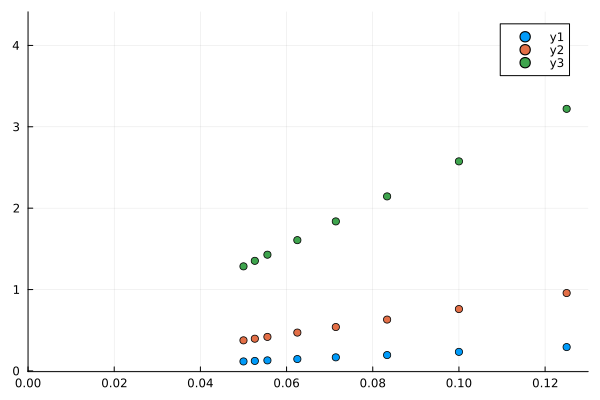

In [23]:
ind = 1
plt = plot(xlims=(0,0.13))
for i = 1:3 
    scatter!(plt,1 ./L_list,real(Δ_list[:,ind,i]))
end

display(plt)

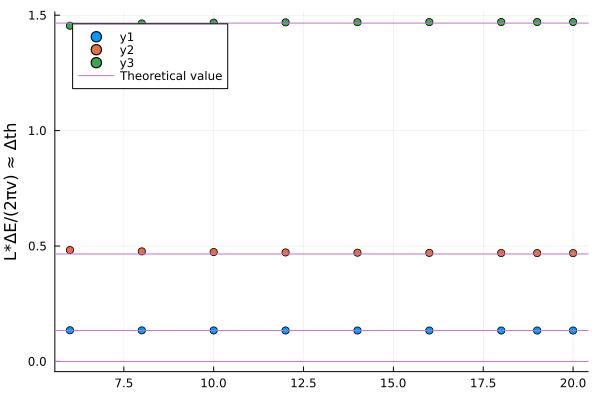

In [24]:
ind = 1
v = 2.8810 − 0.7091im
plt = plot(xlable ="L", ylabel = "L*ΔE/(2πv) ≈ Δth")
for i = 1:3 
    scatter!(plt,L_list,real(Δ_list[:,ind,i].*L_list/(2π*v)))
end
hline!(plt,real([Δth]),label="Theoretical value")
display(plt)

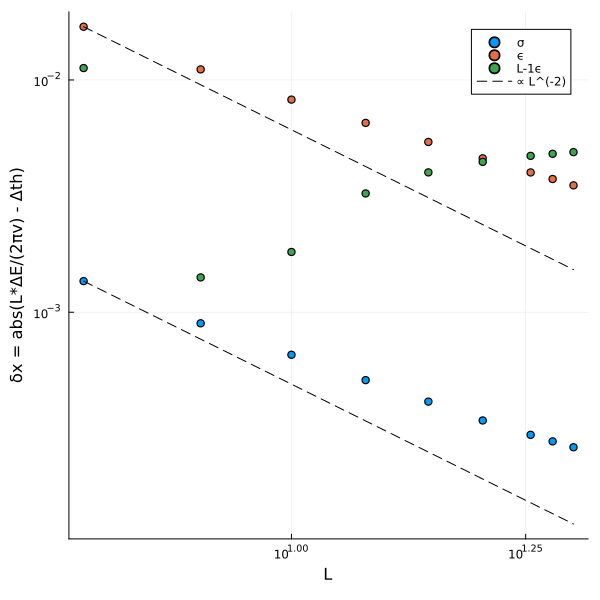

In [25]:
ind = 1
# Yin Tnag
v = 2.8810 − 0.7091im
# GS fitting
#v = 2.8793585911048227 + 0.05332917686611719im
plt = plot(xscale=:log10,yscale=:log10,xlabel="L",ylabel="δx = abs(L*ΔE/(2πv) - Δth)",size=(600,600))
δx = [abs.(real(Δ_list[:,ind,i].*L_list/(2π*v)).-real(Δth[i+1])) for i=1:3]
for i = 1:3 
    scatter!(plt,L_list,δx[i],label=Op_label[i+1])
end
plot!(plt,L_list,δx[1][1]*(L_list/L_list[1]).^(-2),color=:black,label="",linestyle=:dash)
plot!(plt,L_list,δx[2][1]*(L_list/L_list[1]).^(-2),color=:black,label="∝ L^(-2)",linestyle=:dash)
display(plt)

In [26]:
real(E0_list[:,ind])

9-element Vector{Float64}:
 -25.575218375244006
 -33.93199717781915
 -42.31801408607814
 -50.71852368198006
 -59.12727817796195
 -67.54117227467646
 -75.95853516990307
 -80.1681458294912
 -84.3782604046888

In [27]:
using CurveFit

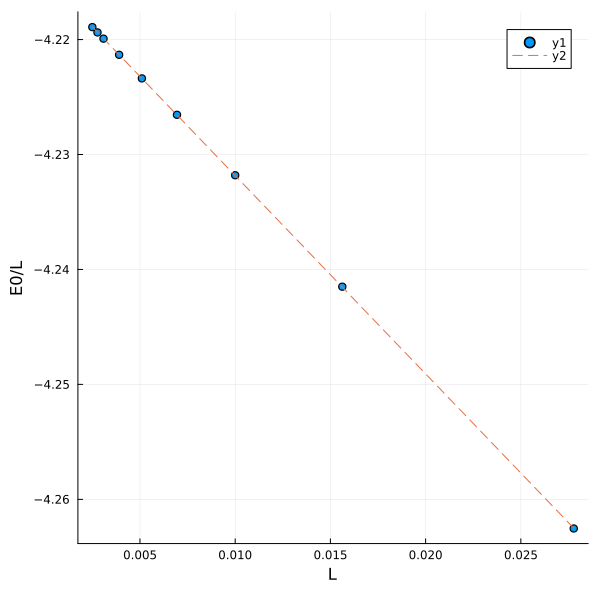

In [28]:
ind = 1
#v = 2.8810 − 0.7091im
ϵ0 = E0_list[:,ind]./L_list
ϵ0_re = real(E0_list[:,ind])./L_list
fit = linear_fit(1.0./L_list.^2, ϵ0)

plt = plot(xlabel="L",ylabel="E0/L",size=(600,600))
scatter!(plt,1.0./L_list.^2,ϵ0_re)
plot!(plt,1.0./L_list.^2, real(fit[1] .+ fit[2]./L_list.^2),linestyle=:dash)
display(plt)

In [29]:
fit[2]

-1.725347675341791 + 0.46303971430053587im

In [30]:
v_list = []
for i=1:length(L_list)-1
    ini = i
    fit = linear_fit(1.0./L_list[ini:ini+1].^2, ϵ0[ini:ini+1])
    @info L_list[i]
    @info fit
    v = -6*fit[2]/π/cth
    @info v
    push!(v_list,v)
end

┌ Info: 6
└ @ Main c:\Users\vicva\OneDrive\Documenten\git\Thesis_CCFT\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X13sZmlsZQ==.jl:5
┌ Info: (-4.214452398967467 + 0.2739807551777537im, -1.7310238886354075 + 0.47006213285849746im)
└ @ Main c:\Users\vicva\OneDrive\Documenten\git\Thesis_CCFT\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X13sZmlsZQ==.jl:6
┌ Info: 2.919878636329321 - 0.7351205067525308im
└ @ Main c:\Users\vicva\OneDrive\Documenten\git\Thesis_CCFT\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X13sZmlsZQ==.jl:8
┌ Info: 8
└ @ Main c:\Users\vicva\OneDrive\Documenten\git\Thesis_CCFT\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X13sZmlsZQ==.jl:5
┌ Info: (-4.214560095506339 + 0.2741182965695332im, -1.724131310147493 + 0.4612594837845799im)
└ @ Main c:\Users\vicva\OneDrive\Documenten\git\Thesis_CCFT\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X13sZmlsZQ==.jl:6
┌ Info: 2.908036835087201 - 0.7205608229829359im
└ @ Main c:\Users\vicva\OneDrive\Documenten\git\Th

In [31]:
v_list

8-element Vector{Any}:
  2.919878636329321 - 0.7351205067525308im
  2.908036835087201 - 0.7205608229829359im
  2.902189019795561 - 0.7136738737352091im
 2.8988013063428313 - 0.7099106886171963im
  2.896625630626644 - 0.7074753182607535im
    2.8896300311654 - 0.7051062100296831im
  2.892454308244098 - 0.7049910796630177im
    2.8916812856255 - 0.7043226618745727im

v_extrapolate = 2.886366530106847 - 0.7003591998848061im


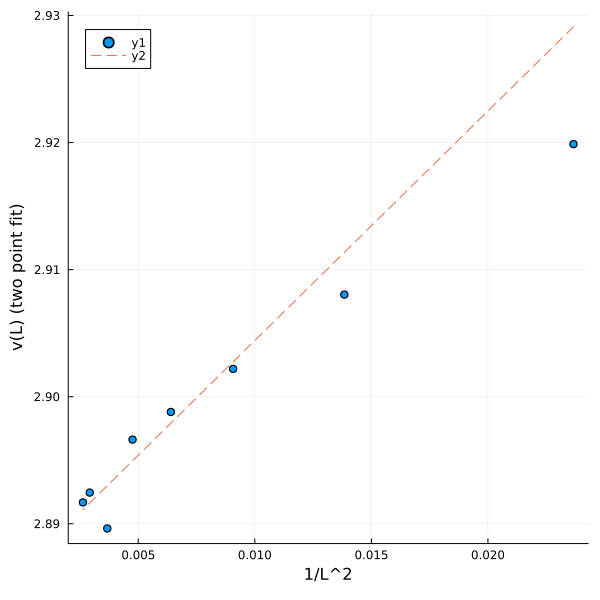

In [38]:
Leff = 0.5.+L_list[1:end-1]
fit = linear_fit(1.0./Leff[3:end].^2,v_list[3:end])
v_extrapolate = fit[1]
@show v_extrapolate
plot(xlabel="1/L^2",ylabel="v(L) (two point fit)",size=(600,600))
scatter!(1.0./Leff.^2,real(v_list))
plot!(1.0./Leff.^2,real(fit[1].+fit[2]./Leff.^2),linestyle = :dash)

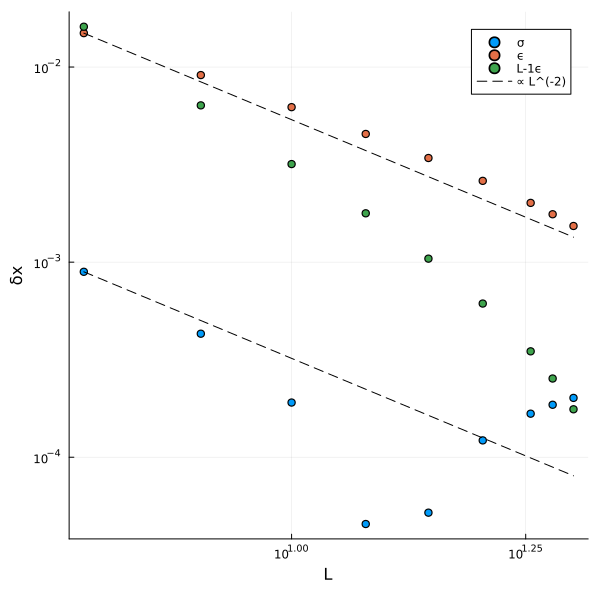

In [33]:
ind = 1
# Yin Tnag
v = 2.8810 − 0.7091im
# GS fitting
v = v_list[end]
#v = 2.8793585911048227 + 0.05332917686611719im
plt = plot(xscale=:log10,yscale=:log10,xlabel="L",ylabel="δx",size=(600,600))
δx = [abs.(real(Δ_list[:,ind,i].*L_list/(2π*v)).-real(Δth[i+1])) for i=1:3]
for i = 1:3 
    scatter!(plt,L_list,δx[i],label=Op_label[i+1])
end
plot!(plt,L_list,δx[1][1]*(L_list/L_list[1]).^(-2),color=:black,label="",linestyle=:dash)
plot!(plt,L_list,δx[2][1]*(L_list/L_list[1]).^(-2),color=:black,label="∝ L^(-2)",linestyle=:dash)
display(plt)

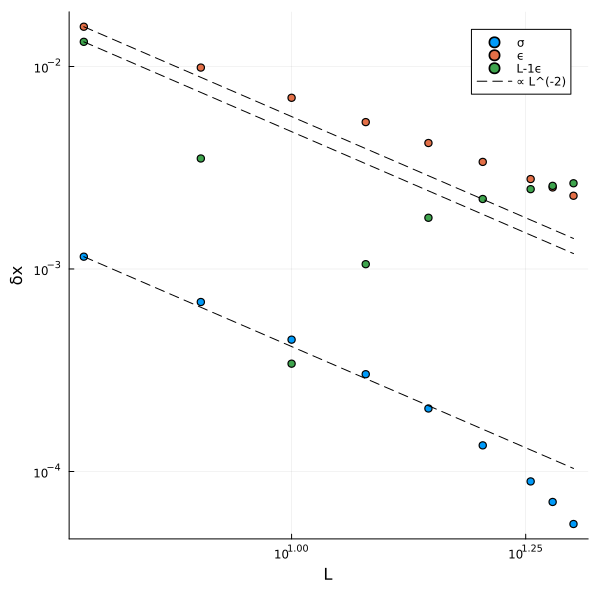

2.886366530106847 - 0.7003591998848061im


In [34]:
ind = 1

v = v_extrapolate
println(v)
#v = 2.8793585911048227 + 0.05332917686611719im
plt = plot(xscale=:log10,yscale=:log10,xlabel="L",ylabel="δx",size=(600,600))
δx = [abs.(real(Δ_list[:,ind,i].*L_list/(2π*v)).-real(Δth[i+1])) for i=1:3]
for i = 1:3 
    scatter!(plt,L_list,δx[i],label=Op_label[i+1])
end
plot!(plt,L_list,δx[1][1]*(L_list/L_list[1]).^(-2),color=:black,label="∝ L^(-2)",linestyle=:dash)
plot!(plt,L_list,δx[2][1]*(L_list/L_list[1]).^(-2),color=:black,label="",linestyle=:dash)
plot!(plt,L_list,δx[3][1]*(L_list/L_list[1]).^(-2),color=:black,label="",linestyle=:dash)
display(plt)

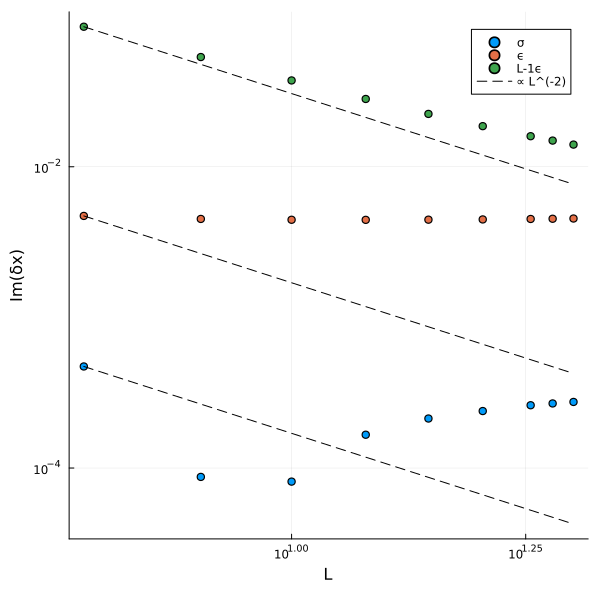

In [35]:
ind = 1

v = v_extrapolate
#v = 2.8793585911048227 + 0.05332917686611719im
plt = plot(xscale=:log10,yscale=:log10,xlabel="L",ylabel="Im(δx)",size=(600,600))
δx = [abs.(imag(Δ_list[:,ind,i].*L_list/(2π*v)).-imag(Δth[i+1])) for i=1:3]
for i = 1:3 
    scatter!(plt,L_list,δx[i],label=Op_label[i+1])
end
plot!(plt,L_list,δx[1][1]*(L_list/L_list[1]).^(-2),color=:black,label="∝ L^(-2)",linestyle=:dash)
plot!(plt,L_list,δx[2][1]*(L_list/L_list[1]).^(-2),color=:black,label="",linestyle=:dash)
plot!(plt,L_list,δx[3][1]*(L_list/L_list[1]).^(-2),color=:black,label="",linestyle=:dash)
display(plt)